In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

In [3]:
scaler = StandardScaler()
train = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.20, random_state=42)

X = np.insert(X_train, 0, 1, axis = 1)
X_val = np.insert(X_test, 0, 1, axis = 1)

In [4]:
def cross_entropy(beta, xiHat, yi, K):
    y_pred = beta @ xiHat
    qi = softmax(y_pred)
    qi = np.log(qi)
    
    pi = yi                  
    loss = 0

    loss = -np.vdot(pi, qi)     #1x1
    

    return loss

In [5]:
def softmax(x):  #Kx1
    
    denom = sum(np.exp(x))    #1x1
    x = np.exp(x) / denom
        
    return x  #Kx1

In [6]:
def grad_L(beta, X, y, K):
    N = X.shape[0]       #160
    grad = np.zeros((K, 5))

    for i in range(N):
        xiHat = X[[i]]           #1x5   
        yi = np.zeros((K,1))   
        yi[y[i]] = 1
        qi = softmax(beta @ xiHat.transpose())
        
        grad_i = (qi - yi) @ xiHat     #Kx(d+1)
        
        grad += grad_i 

    return grad/N     #Kx(d+1)

In [27]:
def grad_descent(X, y):
    alpha = 0.001
    iterations = 500
    K = 3
    N, d_plus_1 = X.shape
    L_vals = np.zeros(iterations)
    beta_t = np.zeros((K,d_plus_1))        #Kx5
        
    for t in range(iterations):
        temp = 0
        for i in range(N):
            xiHat = X[[i]].transpose()
            yi = np.zeros((K,1))
            yi[y[i]] = 1
            temp = cross_entropy(beta_t, xiHat, yi, K)
            
        L_vals[t] = temp
        
        beta_t = beta_t - alpha*grad_L(beta_t, X, y, K)
    
    return beta_t, L_vals

In [28]:
beta_t, L_vals = grad_descent(X, y)

In [32]:
sum(L_vals)

542.8782304640074

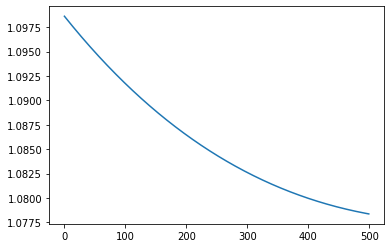

In [29]:
plt.plot(L_vals)

In [30]:
# prediction

N = X_val.shape[0]
K = 3
total = 0

for i in range(N):
    xiHat = X_val[[i]]
    yi = np.zeros((K,1))
    yi[y_test[i]] = 1
    
    qi = softmax(beta_t @ xiHat.transpose())
    max_prob = qi.argmax()                         #get index of highest probability in my ith example
    
    test_pred = np.zeros((K,1))                   
    test_pred[max_prob] = 1                       #convert probability vector to a vector with 0 and 1 only
    
    check = np.vdot(test_pred, yi)                #element wise multiplication, if match, then check = 1, if no match, check = 0 
    total += check
    
print("Accuracy: ", (total / N) * 100, "%")

Accuracy:  70.0 %


In [33]:
df = pd.read_csv('/Users/dchant/Desktop/Math373/Project2/archive/mnist_train.csv')

In [34]:
df.shape

(60000, 785)